In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from numba.np.arraymath import array_cumsum
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

titanic_ds = sns.load_dataset('titanic')
colors = ['red' if x==0 else 'blue' for x in [0, 1]]

titanic_ds.drop(labels=['embark_town', 'embarked', 'deck', 'class', 'alive'], axis=1, inplace=True)

titanic_ds['sex'] = titanic_ds['sex'].map({'male': 0, 'female': 1})
titanic_ds['who'] = titanic_ds['who'].map({'man': 0, 'woman': 1, 'child': 2}) 

titanic_ds.dropna(inplace=True)

X, y = titanic_ds.drop('survived', axis=1), titanic_ds['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=60)

X_train

,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone
310,1,1,24.0,0,0,83.1583,1,False,True
122,2,0,32.5,1,0,30.0708,0,True,False
707,1,0,42.0,0,0,26.2875,0,True,True
37,3,0,21.0,0,0,8.0500,0,True,True
880,2,1,25.0,0,1,26.0000,1,False,False
...,...,...,...,...,...,...,...,...,...
501,3,1,21.0,0,0,7.7500,1,False,True
494,3,0,21.0,0,0,8.0500,0,True,True
731,3,0,11.0,0,0,18.7875,2,False,True
85,3,1,33.0,3,0,15.8500,1,False,False


In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy

0.8465116279069768

In [8]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       157
           1       0.71      0.74      0.73       111

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



[Text(0.5358377659574468, 0.96875, 'fare <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]\nclass = Died'),
 Text(0.29534574468085106, 0.90625, 'survived <= 1.5\ngini = 0.26\nsamples = 378\nvalue = [320, 58]\nclass = Died'),
 Text(0.08297872340425531, 0.84375, 'sex <= 36.5\ngini = 0.465\nsamples = 79\nvalue = [50, 29]\nclass = Died'),
 Text(0.01702127659574468, 0.78125, 'parch <= 38.8\ngini = 0.469\nsamples = 24\nvalue = [9, 15]\nclass = Survived'),
 Text(0.00851063829787234, 0.71875, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = Survived'),
 Text(0.02553191489361702, 0.71875, 'sex <= 33.0\ngini = 0.492\nsamples = 16\nvalue = [9, 7]\nclass = Died'),
 Text(0.01702127659574468, 0.65625, 'parch <= 52.55\ngini = 0.459\nsamples = 14\nvalue = [9, 5]\nclass = Died'),
 Text(0.00851063829787234, 0.59375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Died'),
 Text(0.02553191489361702, 0.59375, 'parch <= 64.979\ngini = 0.496\nsamples = 11\nvalue = [6, 5]\nclass = Died'),
 Text(0.017

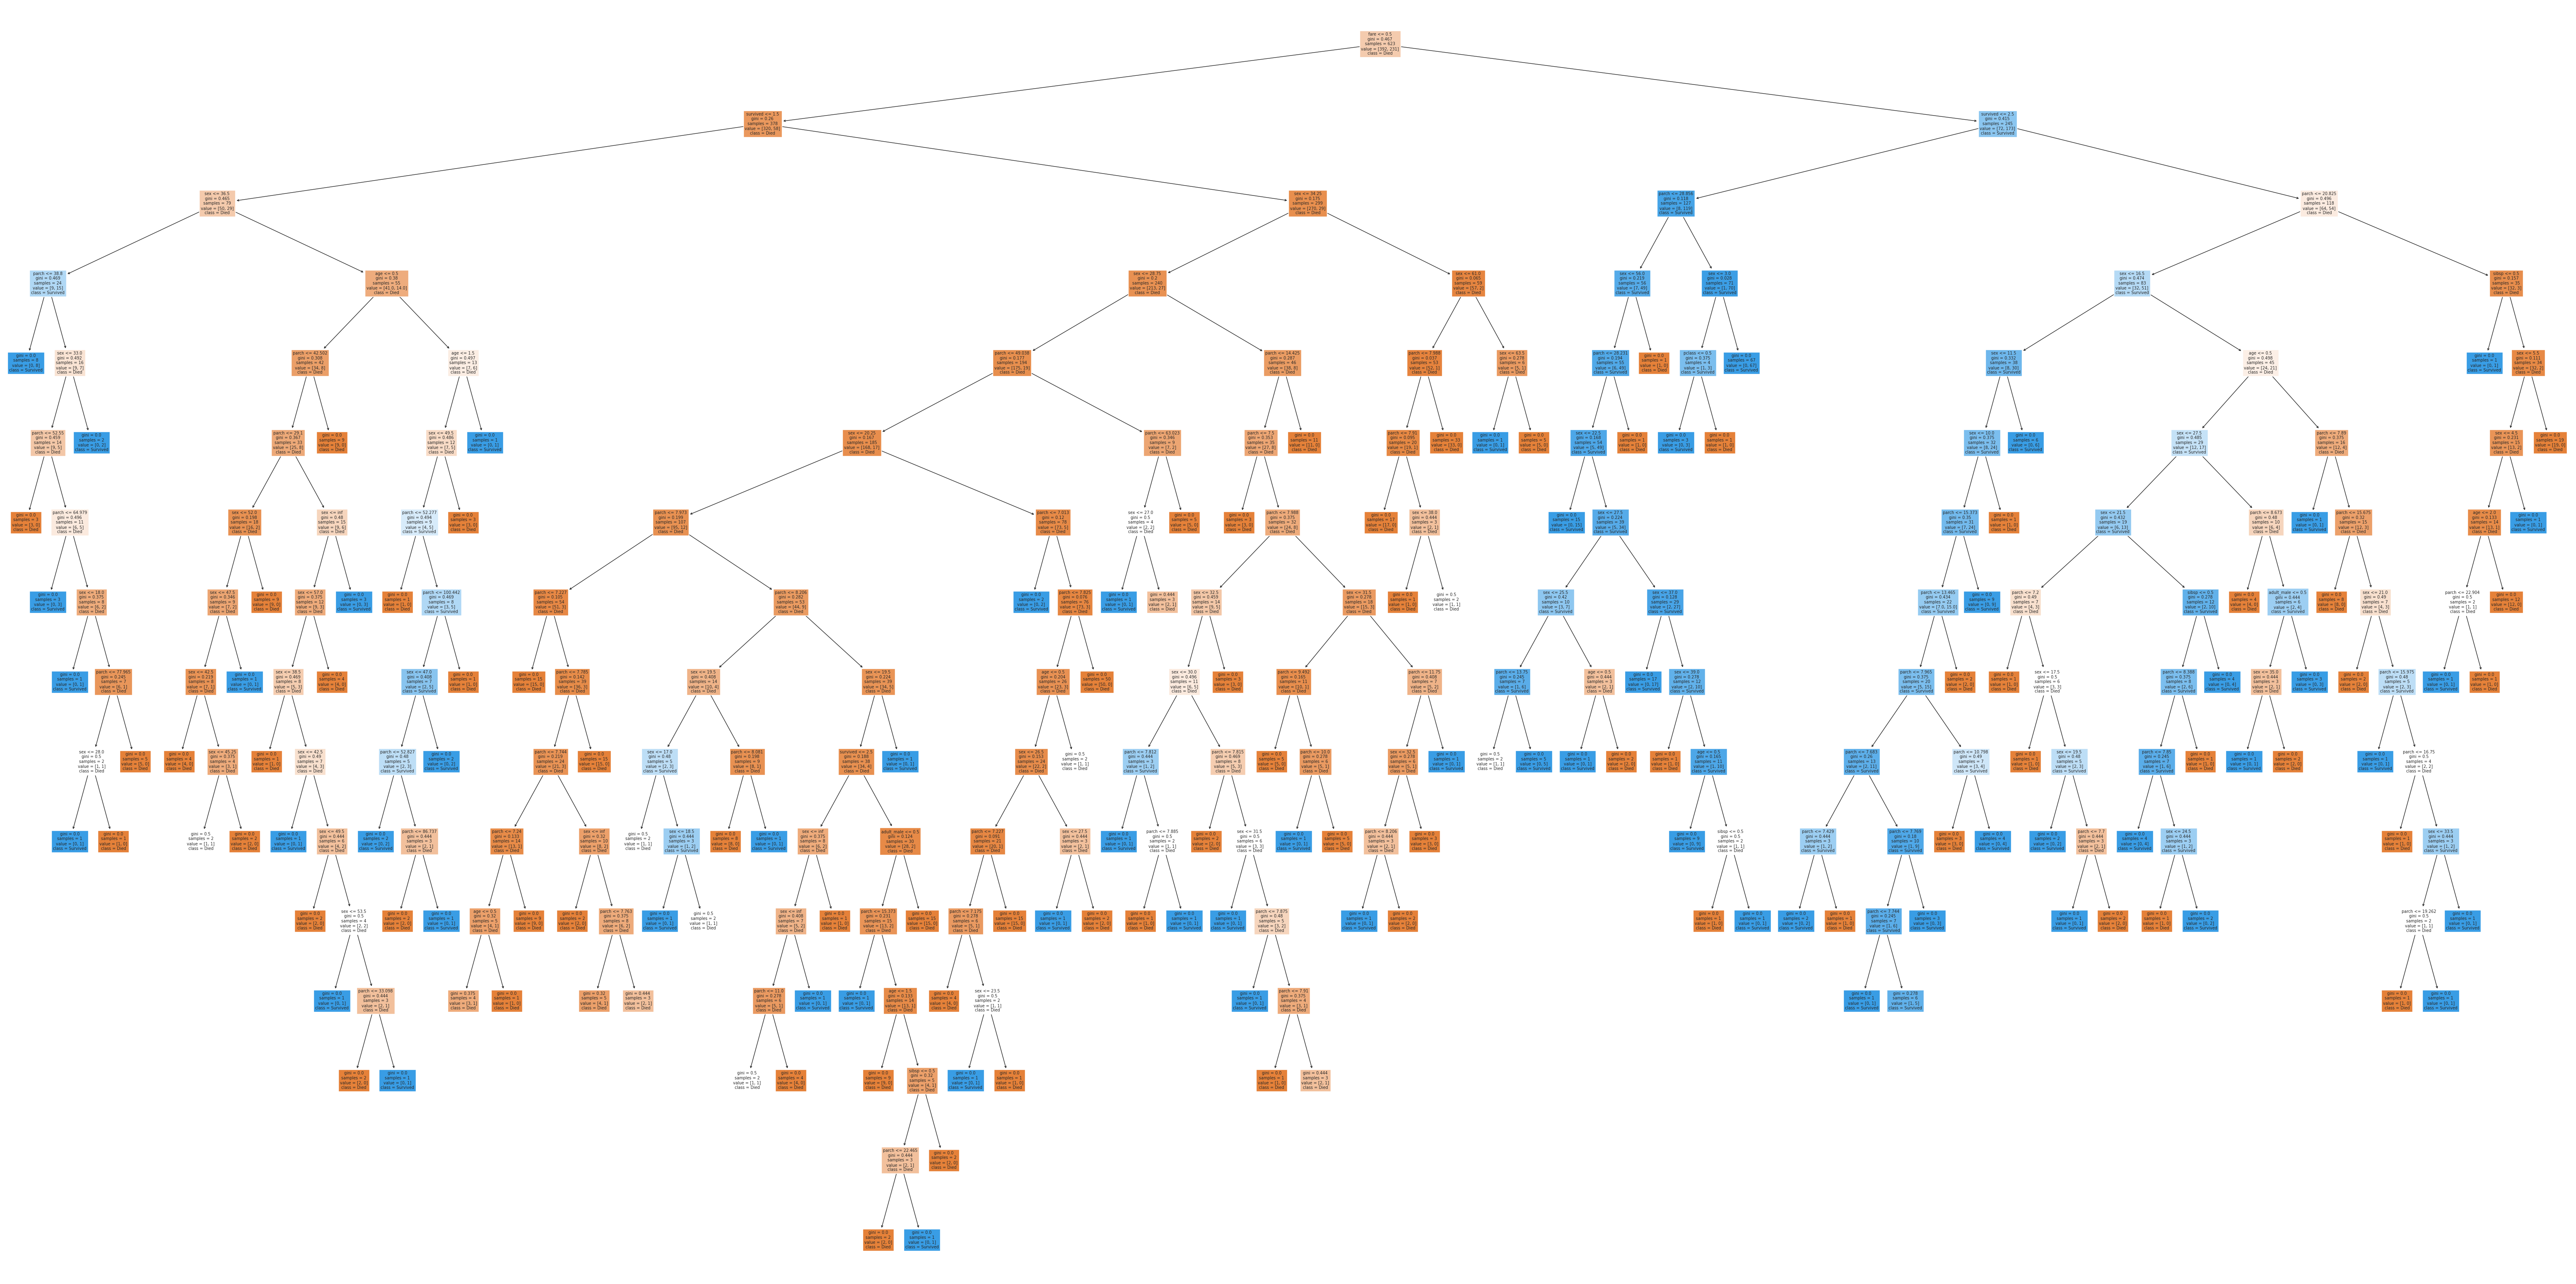

In [37]:
titanic_ds.head()
fn = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who', 'adult_male', 'alone']
plt.figure(figsize=(80, 40))
cn = ['Died', 'Survived']

plot_tree(dtree, filled=True, feature_names=fn, class_names=cn)